In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Matrix definition
There are two ways to define matrices in Python. 

## Python list
Python doesn't have a built-in type for matrices. However, we can treat a list of a list as a matrix. For example:

In [2]:
A = [
        [1, 2],
        [3, 4]
    ]

print(A)

[[1, 2], [3, 4]]


## NumPy Array
NumPy provides multidimensional array of numbers (which is actually an object). NumPy's array class is called ndarray.

In [3]:
B = np.array([
        [1, 2],
        [3, 4]
    ])

print(B)

[[1 2]
 [3 4]]


# Transpose

We can transpose matrices by converting rows into columns. 

In [4]:
# Transpose a python list
A_t = [
        [0, 0],
        [0, 0]
    ]

# iterate through rows
for i in range(len(A)):
   # iterate through columns
   for j in range(len(A[0])):
       A_t[j][i] = A[i][j]

print(A_t)

[[1, 3], [2, 4]]


And it's much easier if using numpy array.

In [5]:
B_t = B.T
print(B_t)

[[1 3]
 [2 4]]


# Addition

We can add one matrix to another (having the same number of dimensions)

In [6]:
C = A + A # NB: Addition of python lists will simply concatenate the two lists
print(C)
print('---')

C = A + B # We can mingle python lists with numpy arrays
print(C)

[[1, 2], [3, 4], [1, 2], [3, 4]]
---
[[2 4]
 [6 8]]


# Subtraction
Basically, the same as addition, but with minus sign. We can't subtract python lists - an exception is thrown.

In [7]:
C = A - B # We can mingle python lists with numpy arrays
print(C)

[[0 0]
 [0 0]]


# Multiply by scalar
We can multiply a matrix by a scalar value. It is expected to multiply all the values in the matrix.

In [8]:
C = 2 * A # Multipling python lists with a scalar will basically duplicate the list
print(C)
print('---')

C = 2 * B # Numpy arrays can safely be multiplied by a scalar
print(C)

[[1, 2], [3, 4], [1, 2], [3, 4]]
---
[[2 4]
 [6 8]]


# Multiply by scalar matrix

We can multiply one matrix to a matrix of scalars (with same dimensionality). It's basically the same as multiplying to scalar value, but each element in the target matrix is being multiplied with different scalar multiplier.

NB: We can't multiply python list to another python list.

In [9]:
C = [[1,5], [2,10]] * B # We can mingle multiply a python list with a numpy array
print(C)

[[ 1 10]
 [ 6 40]]


# Multiply by matrix
Matrix product of two arrays produces a new matrix. For matrix multiplication, the number of columns in the first matrix must be equal to the number of rows in the second matrix. The resulting matrix, known as the *matrix product*, has the number of rows of the first and the number of columns of the second matrix. 

In [10]:
C = np.matmul(A, B) # Matrix product of two arrays.
print(C)

[[ 7 10]
 [15 22]]


In Numpy you can achieve the matrix multiplication by using `dot()` function 
as well.

In [11]:
B.dot(A)  # A is a regular list, so it doesn't have dot() method, whiere B is a ndarray and it has this function.

array([[ 7, 10],
       [15, 22]])

Or by using `@` (at) operator as well.

In [12]:
A @ B

array([[ 7, 10],
       [15, 22]])

Now, let's implement matrix multiplication with vanilla Python.

In [13]:
def multiply_matrices(m1: list, m2: list) -> list:
    """
    Multiplies two matrices and receives a new matrix.

    Args:
        m1 (list): The first matrix.
        m2 (list): The second matrix.

    Returns:
        list: The *matrix product* has the number of rows of the first and the number of columns of the second matrix. 
    """
    # Determine the dimensions of the matrix product.
    rows = len(m1)
    cols = len(m2[0])

    # Initialize the matrix product with zeroes.
    product = [[0 for c in range(cols)] for r in range(rows)]

    # Compute the actual product values.
    for r in range(rows):
        for c in range(cols):
            row_sum = 0
            # Multiply each row from `m1` to each column from `m2`
            for i in range(len(m1[r])):
                row_sum += m1[r][i] * m2[i][c] 
            product[r][c] = row_sum

    return product

In [14]:
m1 = [
    [1,1,1],
    [2,2,2]
]

m2 = [
    [3,30],
    [4,40],
    [5,50]
]

multiply_matrices(m1, m2)

[[12, 120], [24, 240]]

In [15]:
m1 = [
    [1,1,1],
    [2,2,2],
    [3,3,3]
]

m2 = [
    [10,10,10],
    [10,10,10],
    [10,10,10]
]

multiply_matrices(m1, m2)

[[30, 30, 30], [60, 60, 60], [90, 90, 90]]

# Inverse matrix

Each (non-singular) matrix $A$ has an inverse $A^{-1}$. The inverse matrix is defined as the reciprocal one.

$$ A \times A^{-1} = I $$

where $I$ is the Identity matrix :

$$ I = \begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix} $$

NB: **singular matrices** do not have inverse (i.e. are not invertible).

In [16]:
B_i = np.linalg.inv(B)
print(B)
print('---')
print(B_i)
print('--- The result product of the inverse matrix and the original matrix is the identity matrix')
print(np.matmul(B_i, B))

[[1 2]
 [3 4]]
---
[[-2.   1. ]
 [ 1.5 -0.5]]
--- The result product of the inverse matrix and the original matrix is the identity matrix
[[1.00000000e+00 0.00000000e+00]
 [1.11022302e-16 1.00000000e+00]]


NB: Don't get shocked by the imprecise `1` and `0` values in the inverse matrix. This is a common phenomenon for floating-point arithmetics. And, yes `1.11022302e-16` is a so small number that it is basically `0`.


# Matrix determinant 

The determinant of a matrix is a single numerical value which is used when calculating the inverse or when solving systems of linear equations.

The determinant of a matrix $A$ is denoted $|A|$, or sometimes $det(A)$. The determinant is only defined for **square matrices**.

The general formula for the determinant of matrices of any size is very complicated. You will only be asked to compute the determinants of $2 \times 2$ or $3 \times 3 $ matrices by hand.

## Singular matrix
A matrix is said to be singular if its determinant is zero.

# Determinant of a 2×2 matrix
The determinant of a matrix A is commonly denoted $det(A)$, $det A$, or $|A|$.
In particular, the determinant is nonzero if and only if the matrix is invertible and the corresponding linear map is an isomorphism.

Let $A=\begin{pmatrix} a & b\\ c & d \end{pmatrix}$

The determinant of $A$ is 
$$ |A| = ad - bc $$

## Determinant of a 3×3 matrix
The determinant of a $ 3\times 3$ matrix can be calculated by breaking it down into smaller $ 2 \times 2 $ matrices, as follows:

$$ \begin{vmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33} \end{vmatrix} = $$
$$ = a_{11} \begin{vmatrix} a_{22} & a_{23} \\ a_{32} & a_{33} \end{vmatrix} 
- a_{12} \begin{vmatrix} a_{21} & a_{23} \\ a_{31} & a_{33} \end{vmatrix}
+ a_{13} \begin{vmatrix} a_{21} & a_{22} \\ a_{31} & a_{32} \end{vmatrix} $$
$$ = a_{11} (a_{22} a_{33} - a_{23}a_{32}) - a_{12} (a_{21} a_{33} - a_{23}a_{31}) + a_{13} (a_{21} a_{32} - a_{22}a_{31}) $$


# Solve augmented matrix

We can use `numpy.linalg.solve()` for solving linear system of equations (the so called **augmented matrix**).

$$
\left[
\begin{array}{cc|c}
1 & 2 & 4 \\
3 & 4 & 10 \\
\end{array}
\right]
$$

or

$$ \begin{bmatrix}
x + 2y = 4\\
3x + 4y = 10
\end{bmatrix} $$

In [17]:
A = np.array([
    [1, 2], 
    [3, 4]
])
B = np.array([
    [4], 
    [10]
])
np.linalg.solve(A, B)


array([[2.],
       [1.]])

Note that we will achieve the same result without executing the `solve` function.

In [18]:
A_inv = np.linalg.inv(A)
print(A_inv)
print('---')
print(A_inv @ B)

[[-2.   1. ]
 [ 1.5 -0.5]]
---
[[2.]
 [1.]]


# Orthogonal vectors
We say that 2 vectors are orthogonal if they are perpendicular to each other. i.e. the **dot product of the two vectors is zero**.

In [19]:
e1, e2 = [[1, 0], [0, 1]]
print(np.dot(e1, e2))
print('---')
e1, e2 = [[3, 4], [-4, 3]]
print(np.dot(e1, e2))

0
---
0


And now let's plot the basic vectors.

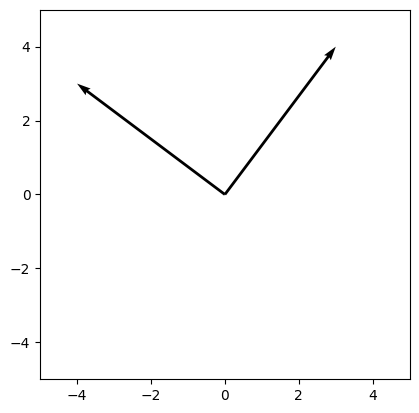

In [20]:
plt.quiver(0, 0, e1[0], e1[1], angles="xy", scale_units="xy", scale=1)
plt.quiver(0, 0, e2[0], e2[1], angles="xy", scale_units="xy", scale=1)

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect("equal")
plt.show()

Visually they also look perpendicular.

# Matrix decomposition
In the mathematical discipline of linear algebra, a matrix decomposition or matrix factorization is a factorization of a matrix into a product of matrices. There are many different matrix decompositions; each finds use among a particular class of problems.

# Conclusions
1. Always use **numpy arrays**. Python lists are not suitable for extensive matrix work.
2. Don't mistake `*` for `@` when multiplying matrices.
3. Get familiar with **inverse matrices** and their applications.